A network is a mathematical structure used to describe ... a fundamental tool for studying complex systems.

A network is made of **nodes** and **links**.

Nodes represent the elements of the system, while links represent the relationships between these elements.

In our example, nodes represent people and links repres... friendship relationships, so we are building a social network.



---

The same structure can describe very different systems.

In **social networks** node → person and link → interaction.

In **transportation networks** node → airport or station and link → direct connection.

On the **Internet** node → web page and link → hyperlink.

In **biology** node → neuron or protein and link → interaction or synapse.

---

The meaning of the nodes changes, but the network structure remains the same.


## Friendship Network

We start by importing the required libraries. NetworkX is used to build and analyze the network, while Matplotlib is used to visualize the network and the results of the analysis.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

We then create an empty undirected graph. In an undirected graph, links have no direction, so a connection is mutual: if Alice is connected to Bob, then Bob is also connected to Alice. This is a natural choice for friendship networks (for example on Facebook). On Instagram, instead, the “follow” relationship can be one-directional.

In [2]:
# Create graph
G = nx.Graph()

We add the nodes of the network. Each node represents a person in the friendship network. At this stage we are only defining who belongs to the system, without specifying relationships yet.

In [3]:
G.add_nodes_from(["Alice", "Bob", "Carla", "David", "Emma", "Luca", "Paolo", "Luigi"])

Next we add the links, that is, the friendship relationships between people. Each pair indicates that there is a direct connection between two nodes. In this way we define the structure of the network.

In [4]:
G.add_edges_from([
    ("Alice", "Bob"),
    ("Alice", "Carla"),
    ("Bob", "David"),
    ("Carla", "David"),
    ("David", "Emma"),
    ("Luca", "Bob"),
    ("Luca", "David"),
    ("Luca", "Paolo"),
    ("Luca", "Luigi")
])

We now compute the position of the nodes in the plane using a spring layout. This algorithm places nodes by simulating springs between connected nodes, so that more strongly connected nodes tend to be closer.

...

We create the first visualization of the network. We set the figure size and draw nodes, edges, and labels separately to have more control over the appearance of the plot.


In [5]:
pos = nx.spring_layout(G, seed=42)  # or nx.kamada_kawai_layout(G)

The nodes are drawn as circles, all with the same size and color. In this first visualization every node is treated the same way, without using information about degree yet.

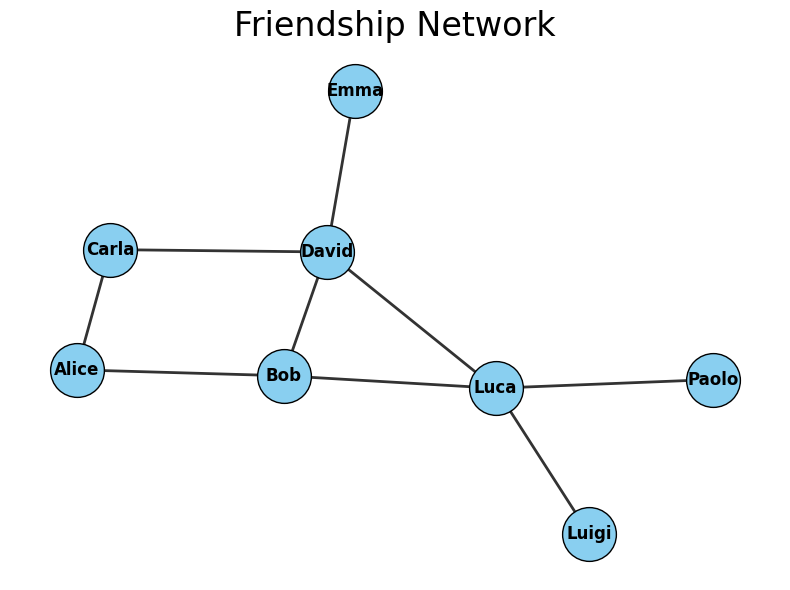

In [6]:
# Plot
plt.figure(figsize=(8, 6))


nx.draw_networkx_nodes(
    G, pos,
    node_size=1500,
    node_color="#89CFF0",
    edgecolors="black"
)

nx.draw_networkx_edges(
    G, pos,
    width=2,
    alpha=0.8
)
nx.draw_networkx_labels(
    G, pos,
    font_size=12,
    font_weight="bold"
)
plt.title("Friendship Network", fontsize=24)
plt.axis("off")
plt.tight_layout()
plt.show()


A fundamental quantity to analyze a network is the degree of a node, i.e., the number of links connected to that node. In our example it represents the number of friends a person has. Nodes with high degree are more connected, while nodes with low degree are more peripheral in the network.

We compute the degree of each node, i.e., the number of friendships of each person. The result is a dictionary that maps each node to its degree.

In [7]:
degree_dict = dict(G.degree())
degree_dict

{'Alice': 2,
 'Bob': 3,
 'Carla': 2,
 'David': 4,
 'Emma': 1,
 'Luca': 4,
 'Paolo': 1,
 'Luigi': 1}

We draw the network again, this time making node size and color depend on degree. In this way it becomes immediately visible which nodes are the most connected within the network.

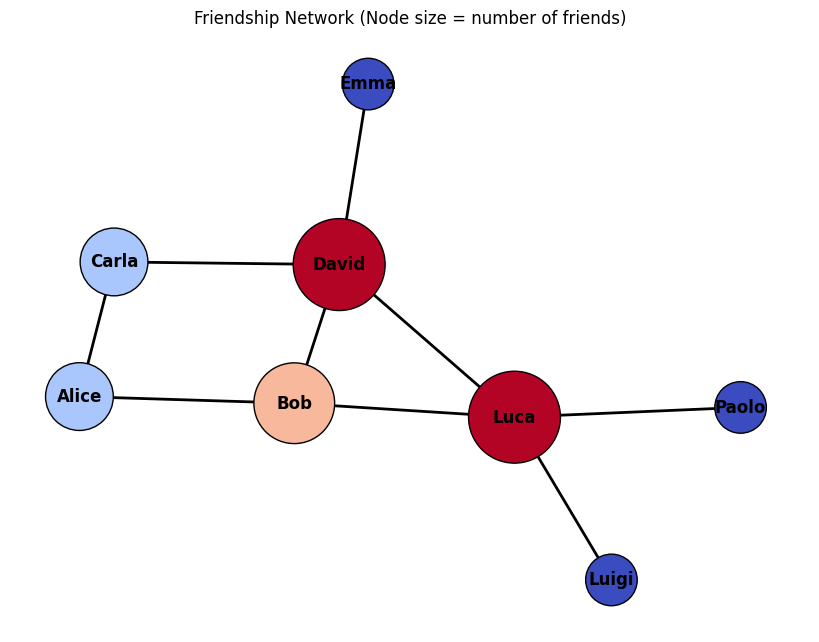

In [8]:
degrees = dict(G.degree())
node_sizes = [380 + 1000 * degrees[n] for n in G.nodes()]

plt.figure(figsize=(8, 6))

nx.draw(
    G, pos,
    with_labels=True,
    node_size=node_sizes,
    node_color=list(degrees.values()),
    cmap=plt.cm.coolwarm,
    edgecolors="black",
    width=2,
    font_weight="bold"
)

plt.title("Friendship Network (Node size = number of friends)")
plt.axis("off")
plt.show()



Finally we analyze the degree distribution, which tells us how many nodes have degree 1, degree 2, degree 3, and so on. This helps us understand whether the network is fairly uniform or whether there are nodes that are much more connected than others.

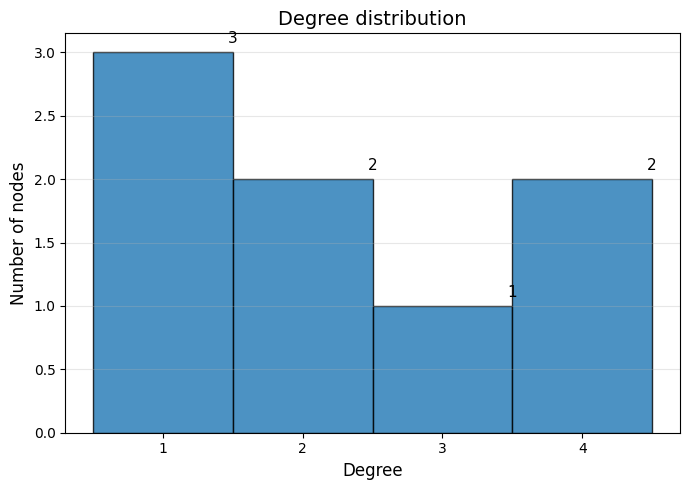

In [9]:
import matplotlib.pyplot as plt

degrees = list(degree_dict.values())

plt.figure(figsize=(7, 5))

# Impostiamo i bin dell’istogramma in modo che ogni barra corrisponda a un valore intero del grado.
bins = range(min(degrees), max(degrees) + 2)

#Disegniamo l’istogramma e aggiungiamo etichette e titolo per rendere il grafico leggibile.

counts, bins, patches = plt.hist(
    degrees,
    bins=bins,
    align="left",
    edgecolor="black",
    alpha=0.8
)

plt.xticks(range(min(degrees), max(degrees) + 1))
plt.xlabel("Degree", fontsize=12)
plt.ylabel("Number of nodes", fontsize=12)
plt.title("Degree distribution", fontsize=14)

# Scriviamo sopra ogni barra il numero di nodi con quel grado, per rendere il grafico ancora più chiaro.
for count, x in zip(counts, bins):
    if count > 0:
        plt.text(x + 0.5, count + 0.05, int(count), ha="center", va="bottom", fontsize=11)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


## Karate Club

In this second activity we introduce a “classic” network in network science: the **Karate Club Network** by Wayne W. Zachary. This is a real dataset (1970s) describing social relationships among members of a karate club. During the observation period, a conflict arose between two central figures and the club split into two groups. One of the most interesting aspects is that the network structure already contains strong signals about the social organization and the “communities” that emerge.


With `nx.karate_club_graph()` we load the Karate Club Network directly. It is an undirected graph where nodes are club members and links represent observed social relationships. The nodes do not have human-readable names: they are numbered (0, 1, 2, …), because the dataset is an abstract model of a real social network.


In [10]:
G = nx.karate_club_graph()
print(G.number_of_nodes(), G.number_of_edges())

34 78


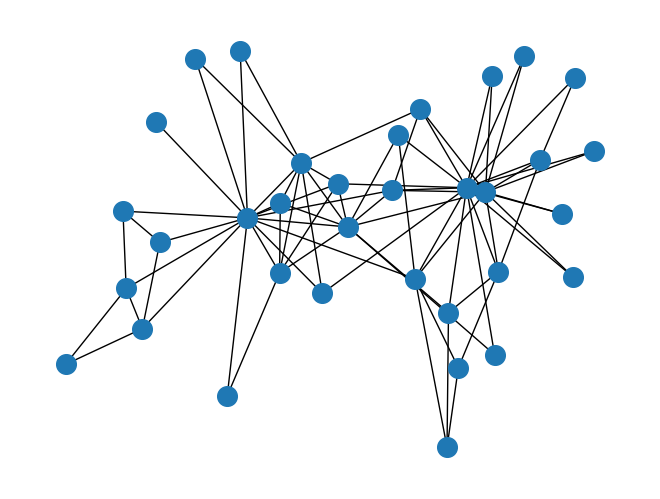

In [11]:
pos = nx.spring_layout(G, seed=7)
nx.draw(G, pos, node_size=200, with_labels=False)
plt.show()

In [12]:
deg = dict(G.degree())
top_deg = sorted(deg.items(), key=lambda x: x[1], reverse=True)[:5]
top_deg


[(33, 17), (0, 16), (32, 12), (2, 10), (1, 9)]

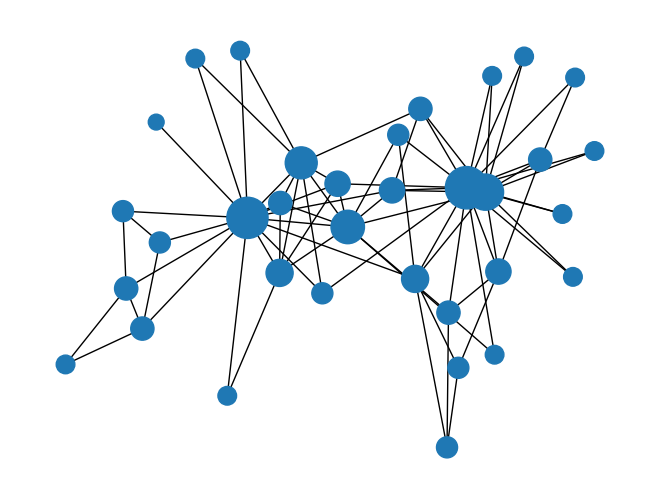

In [13]:
sizes = [80 + 50*deg[n] for n in G.nodes()]
nx.draw(G, pos, node_size=sizes, with_labels=False)
plt.show()


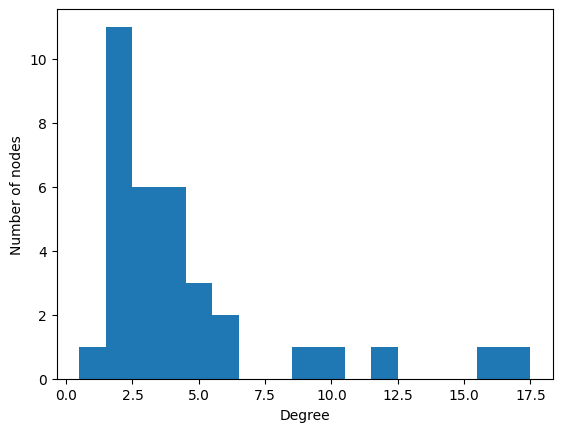

In [14]:
degrees = list(deg.values())
plt.hist(degrees, bins=range(min(degrees), max(degrees)+2), align="left")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

In this part we use a **community detection** algorithm, i.e., a method that automatically identifies groups of nodes that are more densely connected to each other than to the rest of the network. The idea is that a community can represent a social group, a faction, or a coherent subgroup within the network. We will not go into the details of the methods, but finding communities in a network is very important when analyzing data.


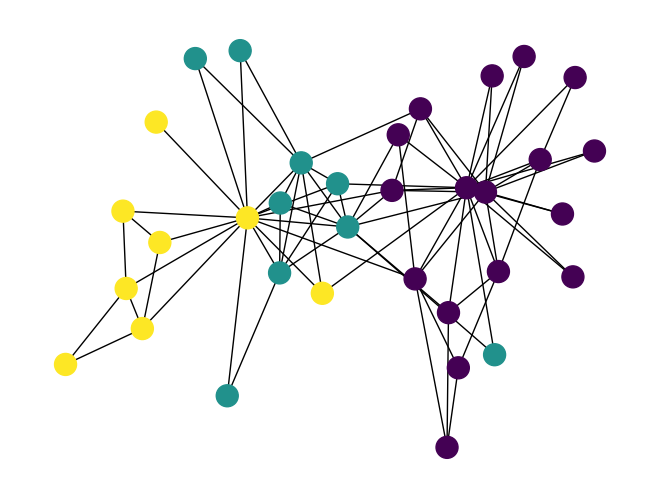

In [15]:
from networkx.algorithms.community import greedy_modularity_communities

communities = list(greedy_modularity_communities(G))
len(communities), [len(c) for c in communities]

import itertools

color_map = {}
for i, com in enumerate(communities):
    for n in com:
        color_map[n] = i

colors = [color_map[n] for n in G.nodes()]
nx.draw(G, pos, node_color=colors, node_size=250, with_labels=False)
plt.show()

## Florentine Families

We now analyze the **Florentine Families Network**, a historical dataset describing relationships among some of the most important noble families in Florence in the 15th century. Nodes represent families, while links represent social and economic ties, especially marriages and alliances. This network is often used because, although it is small, it clearly shows how the structure of relationships can reflect real power dynamics.

A first way to measure the importance of a node in a network is its **degree**, i.e., the number of direct connections it has. In the Florentine context, degree corresponds to how many direct alliances a family has. However, degree is not always enough to describe the role of a node in the network.

In fact, **a family can have few direct alliances but occupy a strategic position** if it lies on the paths that connect different parts of the network. To capture this kind of importance we introduce the idea of **centrality**. Centrality measures how structurally central a node is, i.e., how important it is for the functioning of the network as a whole.

In particular, **betweenness centrality** measures **how often a node lies on shortest paths** between other pairs of nodes. A node with high betweenness acts as an intermediary or “bridge” between different groups. In the Florentine Families Network, a family with high betweenness can facilitate or control flows of information, resources, and alliances between parts of the network.

This is why degree is not the only fundamental measure. A node can have many connections but still sit in a relatively peripheral region, while another node with fewer connections can be crucial for keeping the network connected. Centrality allows us to go beyond simple “popularity” and study a node’s structural role.

The Florentine Families Network is a classic example of this distinction: the **Medici** family emerges as highly central not only because of its number of alliances, but especially because of its bridging position between different families. This shows that power in a social network depends on structure and position, not only on the number of direct ties.


15 20


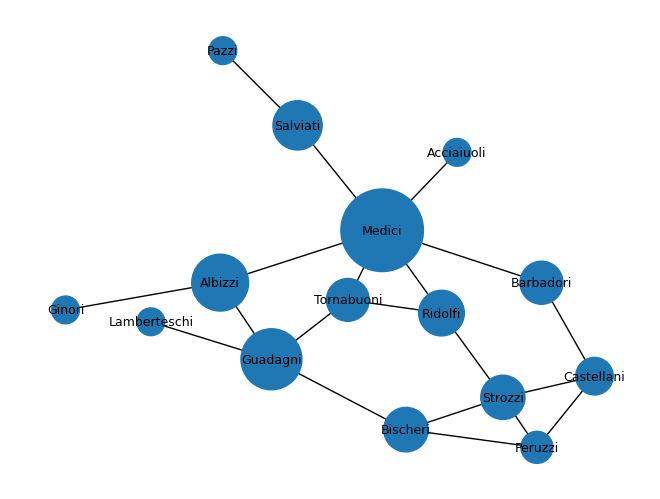

[('Medici', 0.521978021978022),
 ('Guadagni', 0.2545787545787546),
 ('Albizzi', 0.21245421245421245),
 ('Salviati', 0.14285714285714288),
 ('Ridolfi', 0.11355311355311355)]

In [16]:
H = nx.florentine_families_graph()
print(H.number_of_nodes(), H.number_of_edges())
posH = nx.spring_layout(H, seed=3)

btwH = nx.betweenness_centrality(H)
sizesH = [400 + 6000*btwH[n] for n in H.nodes()]

nx.draw(H, posH, with_labels=True, node_size=sizesH, font_size=9)
plt.show()

sorted(btwH.items(), key=lambda x: x[1], reverse=True)[:5]


## Types of Networks

We now compare four network models that are widely used in ... very different real systems. The goal is not only to visualize different networks, but also to understand how they are created and what kinds of real phenomena they represent.

The first model is the **1D lattice** (ring lattice). In this network, nodes are arranged on a circle and each node is connected to its nearest neighbors. In this case there is no randomness: the network is fully **regular** and all nodes have the same **degree**. This kind of structure represents very ordered and local systems, such as people sitting in a circle who only talk to their neighbors, or simple physical models such as atomic chains or coupled oscillators.

The second model is the **2D lattice** (grid). Here nodes are arranged on a **grid** and each node is connected to its spatial neighbors. In the code we use a square grid of side length **L**. This type of network is typical of systems embedded in **physical space**, such as cells in a solid material, intersections in a grid-like city, or diffusion models on surfaces. Also in this case the structure is very **regular** and distances between nodes grow slowly, making average paths relatively long.

The third model is the **small-world network**, introduced by Watts and Strogatz. This network starts from a regular lattice and adds a small number of **random links**. In the code this happens by choosing a rewiring probability **p** greater than zero. The result is a network that keeps high **local clustering**, but where average distances between nodes become very small. This is the model that explains the phenomenon of **six degrees of separation**. Many real social systems, such as friendship networks, scientific collaborations, or professional contacts, show a small-world structure.

The fourth model is the **scale-free network**, built with the Barabási–Albert model. In this case the network **grows over time** and new nodes connect preferentially to nodes that are already very connected. This mechanism, called **preferential attachment**, produces a network in which a few nodes become highly connected **hubs**, while most nodes have few links. In the code this model is generated by specifying how many links each new node creates when it enters the network. Scale-free networks are common in the real world: typical examples include the web, many social platforms, and airport networks, where a few hubs concentrate most connections.

In all visualizations, node size depends on **degree**, i.e., the number of connections. This makes it easy to see the difference between **regular** networks, where nodes are similar, and **heterogeneous** networks such as scale-free networks, where hubs clearly emerge. By comparing these models we can understand how network structure influences information diffusion, robustness to failures, and the role of central nodes.


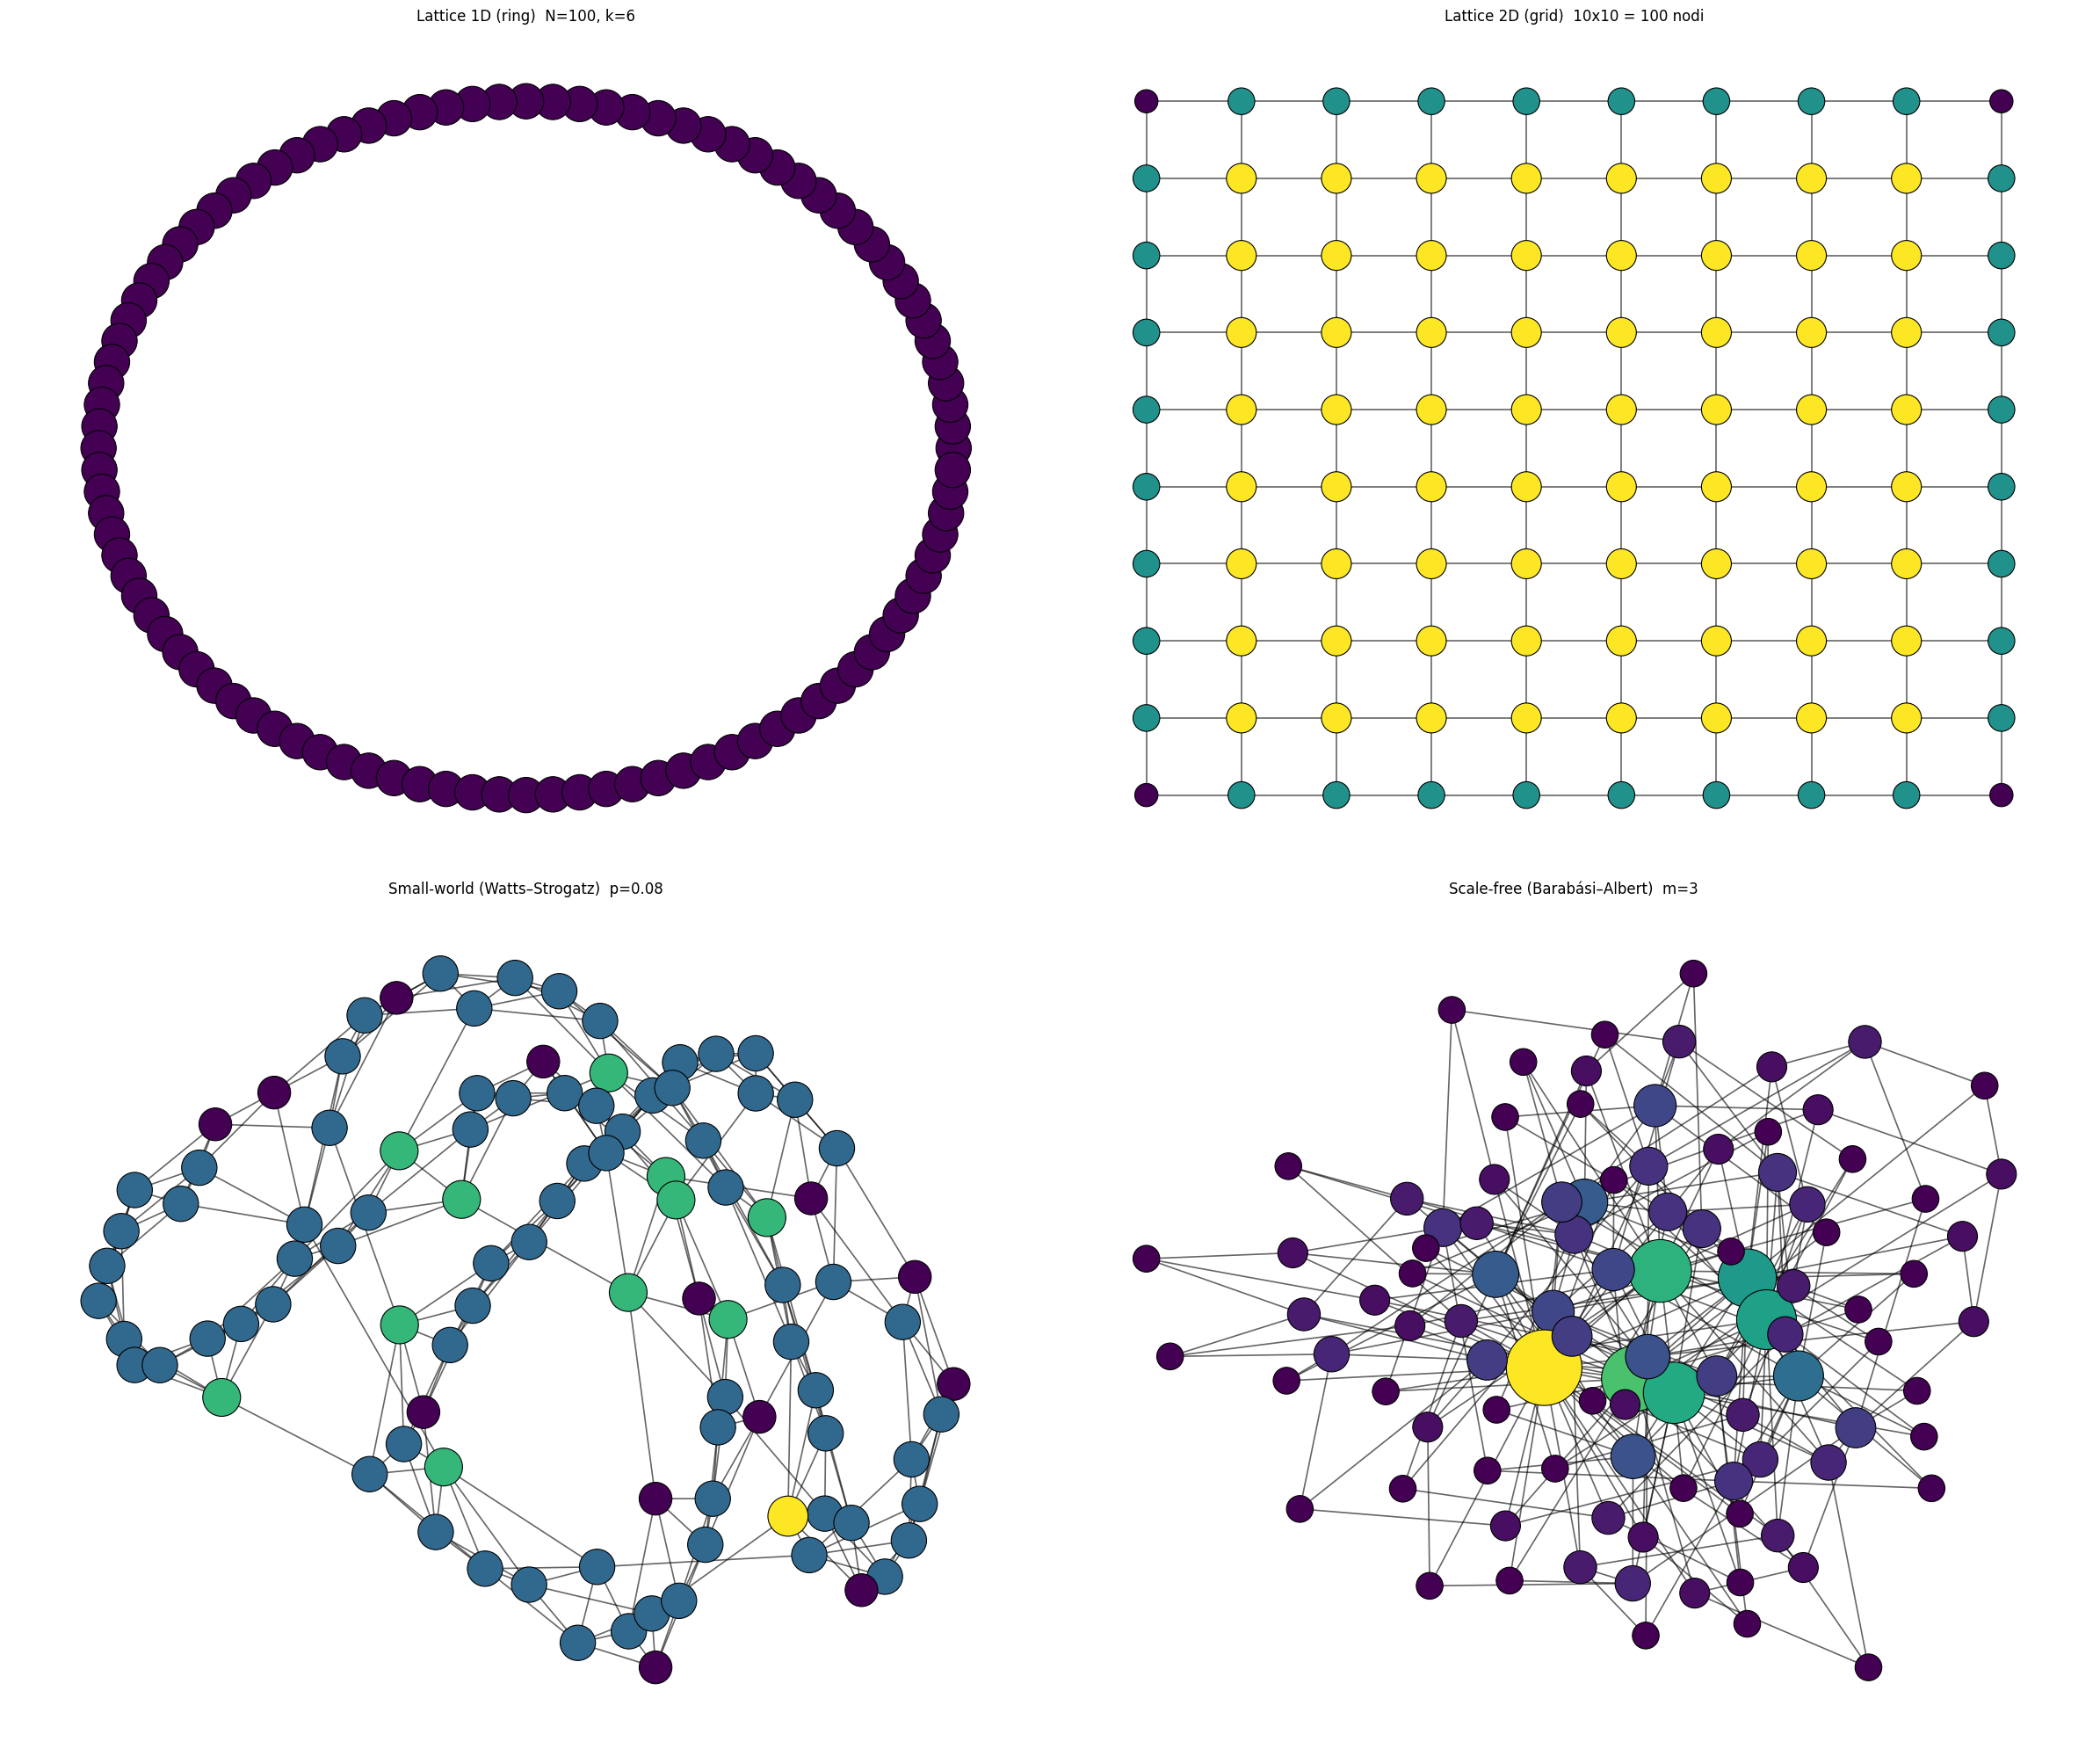

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def node_sizes_by_degree(G, base=120, scale=120):
    deg = dict(G.degree())
    sizes = [base + scale * deg[n] for n in G.nodes()]
    colors = [deg[n] for n in G.nodes()]  # color = degree
    return sizes, colors

def draw(ax, G, pos, title):
    sizes, colors = node_sizes_by_degree(G)
    ax.set_title(title, fontsize=12)

    nx.draw_networkx_edges(G, pos, ax=ax, width=1.2, alpha=0.6)
    nx.draw_networkx_nodes(
        G, pos, ax=ax,
        node_size=sizes,
        node_color=colors,
        cmap=plt.cm.viridis,
        edgecolors="black",
        linewidths=0.8
    )
    ax.axis("off")

# -----------------------
# Parametri (modifica qui)
# -----------------------
N = 100          # nodi per ring/small-world/scale-free
k = 6            # vicini nel ring lattice (deve essere pari)
p = 0.08         # rewiring small-world
m_attach = 3     # attacchi BA

L = 10           # lato griglia 2D (LxL nodi)

# -----------------------
# 1) Lattice 1D (ring)
# -----------------------
G_ring = nx.watts_strogatz_graph(N, k, 0)   # p=0 => lattice regolare
pos_ring = nx.circular_layout(G_ring)

# -----------------------
# 2) Lattice 2D (grid)
# -----------------------
G_grid = nx.grid_2d_graph(L, L)  # nodi = coppie (i,j)
pos_grid = { (i, j): (j, -i) for i, j in G_grid.nodes() }  # layout "a griglia"

# -----------------------
# 3) Small-world (WS)
# -----------------------
G_sw = nx.watts_strogatz_graph(N, k, p)
pos_sw = nx.spring_layout(G_sw, seed=2)

# -----------------------
# 4) Scale-free (BA)
# -----------------------
G_sf = nx.barabasi_albert_graph(N, m_attach)
pos_sf = nx.spring_layout(G_sf, seed=3)

# -----------------------
# Plot
# -----------------------
fig, axes = plt.subplots(2, 2, figsize=(24, 20))

draw(axes[0, 0], G_ring, pos_ring, f"Lattice 1D (ring)  N={N}, k={k}")
draw(axes[0, 1], G_grid, pos_grid, f"Lattice 2D (grid)  {L}x{L} = {L*L} nodi")
draw(axes[1, 0], G_sw, pos_sw, f"Small-world (Watts–Strogatz)  p={p}")
draw(axes[1, 1], G_sf, pos_sf, f"Scale-free (Barabási–Albert)  m={m_attach}")

plt.tight_layout()
plt.show()


## Pokémon Network

Even from a dataset that may look simple and entertainment-related, such as the **Pokémon** dataset, it is possible to extract interesting information and perform meaningful analyses. Pokémon are not only characters from games or media: they can be described as structured data, where each Pokémon has well-defined attributes such as type, generation, and special properties.

In this activity we use the Pokémon dataset to show how tools from **data analysis** and **network science** can be applied to very different contexts. With simple counting, visualization, and network construction, we can detect patterns and relationships that are not immediately visible from the raw table.

The goal is not to “study Pokémon” as an end in itself, but to use a familiar example to learn the logic of data analysis and networks. The same methods can be applied to real problems such as social networks, transportation systems, or biological networks.


We start by loading the Pokémon dataset using **pandas**. The file is downloaded directly from the internet as a CSV and read into a DataFrame called `df`. A DataFrame can be seen as a table similar to a spreadsheet: each row represents a Pokémon and each column represents a feature (type, generation, whether it is legendary, and so on). By printing the first rows with `head()` we can quickly check that the dataset was loaded correctly and inspect its structure.


In [18]:
import pandas as pd # Importiamo il pacchetto


# Download the dataset directly from the Internet
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
df = pd.read_csv(url)

# Show the first rows of the dataset
print(df.head())

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  


We then use the dataset to build a **bipartite Pokémon–Types network**. To keep the graph readable, we limit the analysis to **Generation 1**, which contains 151 Pokémon. This avoids creating an overly large graph that would be difficult to interpret visually.


In [ ]:
df = df[df["Generation"] == 1].copy()

We build the network using NetworkX. We create an empty graph and add two different kinds of nodes: Pokémon and types. Each Pokémon is connected to its **Type 1** and, when present, also to its **Type 2**. This means there are no direct links between Pokémon (or between types), only links between Pokémon and types. The resulting network is a standard example of a **bipartite network**.


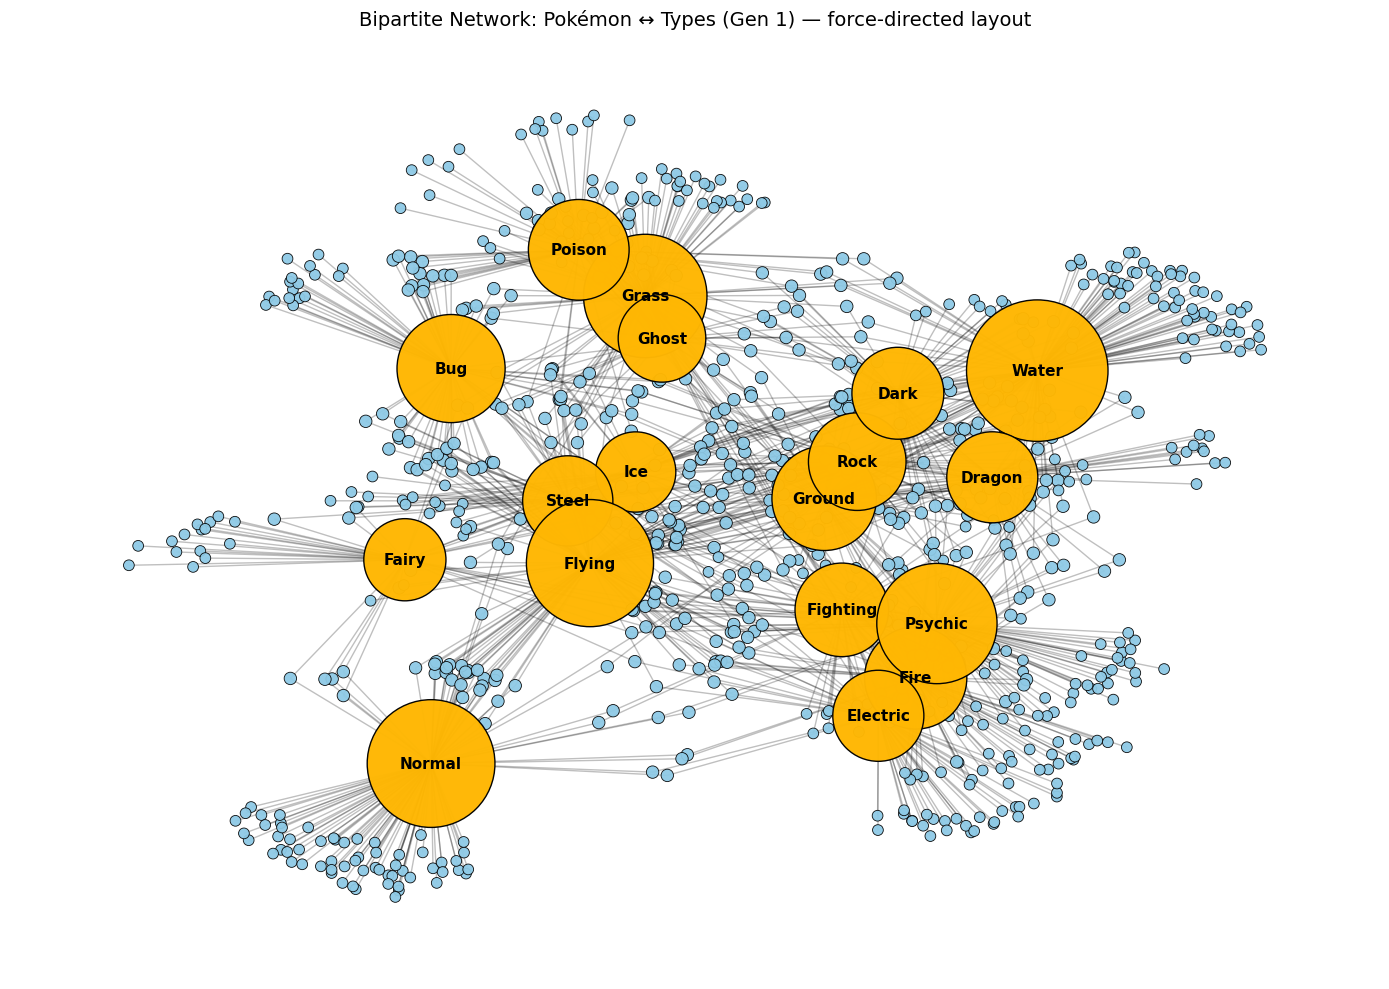

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# -----------------------------
# 2) Build bipartite graph: Pokemon <-> Types
# -----------------------------
B = nx.Graph()

pokemon_nodes = df["Name"].tolist()

# Prende tutti i tipi presenti (Type 1 e Type 2)
type_nodes = pd.unique(df[["Type 1", "Type 2"]].values.ravel("K"))
type_nodes = [t for t in type_nodes if pd.notna(t)]

B.add_nodes_from(pokemon_nodes, bipartite=0, kind="pokemon")
B.add_nodes_from(type_nodes, bipartite=1, kind="type")

for _, row in df.iterrows():
    p = row["Name"]
    t1 = row["Type 1"]
    t2 = row["Type 2"]
    B.add_edge(p, t1)
    if pd.notna(t2):
        B.add_edge(p, t2)

# -----------------------------
#    Spring layout = force-directed
# -----------------------------
pos = nx.spring_layout(B, seed=7, k=0.35)  # k controlla "spaziatura"

# -----------------------------
# 4) Node styling: size by degree, color by bipartite set
# -----------------------------
deg = dict(B.degree())

# separa nodi
pokemons = [n for n, d in B.nodes(data=True) if d.get("kind") == "pokemon"]
types = [n for n, d in B.nodes(data=True) if d.get("kind") == "type"]

pokemon_sizes = [40 + 20 * deg[n] for n in pokemons]
type_sizes    = [300 + 80 * deg[n] for n in types]

plt.figure(figsize=(14, 10))

# edges
nx.draw_networkx_edges(B, pos, alpha=0.25, width=1.0)

# pokemon nodes
nx.draw_networkx_nodes(
    B, pos,
    nodelist=pokemons,
    node_size=pokemon_sizes,
    node_color="#8ecae6",
    edgecolors="black",
    linewidths=0.6,
    alpha=0.95,
    label="Pokémon"
)

# type nodes
nx.draw_networkx_nodes(
    B, pos,
    nodelist=types,
    node_size=type_sizes,
    node_color="#ffb703",
    edgecolors="black",
    linewidths=1.0,
    alpha=0.98,
    label="Types"
)



nx.draw_networkx_labels(
    B, pos,
    labels={t: t for t in types},
    font_size=11,
    font_weight="bold"
)

plt.title("Bipartite Network: Pokémon ↔ Types (Gen 1) — force-directed layout", fontsize=14)
plt.axis("off")
#plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()


After visualizing the network we move to a more standard data analysis of the dataset. We compute the number of Pokémon by **primary type (Type 1)** using `value_counts()` and plot the result as a bar chart. This allows us to see which types are most common and which are rarer.


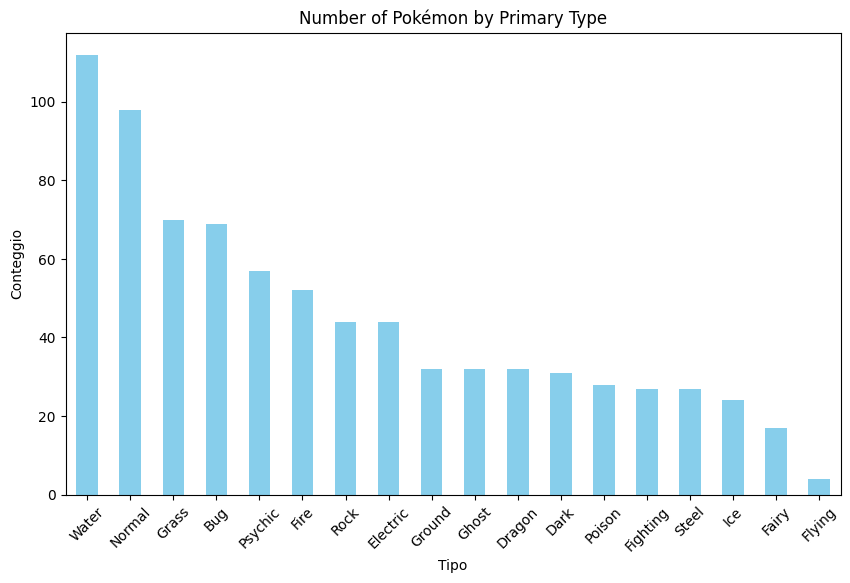

In [20]:
import matplotlib.pyplot as plt

# Count Pokémon by 'Type 1'
tipo_pokemon = df['Type 1'].value_counts()

# Create a bar chart
plt.figure(figsize=(10,6))
tipo_pokemon.plot(kind='bar', color='skyblue')
plt.title('Number of Pokémon by Primary Type')
plt.xlabel('Tipo')
plt.ylabel('Conteggio')
plt.xticks(rotation=45)
plt.show()

Next we go back to the full dataset and analyze **legendary Pokémon**. We filter the DataFrame by selecting only the rows where the `Legendary` column is true. Printing a subset of columns helps us see which Pokémon are classified as legendary and in which generation they appear.


In [21]:
# Download the dataset directly from the Internet
url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
df = pd.read_csv(url)

# Show the first rows of the dataset
print(df.head())

   #                   Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  \
0  1              Bulbasaur  Grass  Poison  45      49       49       65   
1  2                Ivysaur  Grass  Poison  60      62       63       80   
2  3               Venusaur  Grass  Poison  80      82       83      100   
3  3  VenusaurMega Venusaur  Grass  Poison  80     100      123      122   
4  4             Charmander   Fire     NaN  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
0       65     45           1      False  
1       80     60           1      False  
2      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False  


In [22]:
# Select only legendary Pokémon
leggendari = df[df['Legendary'] == True]
print(leggendari[['Name', 'Type 1', 'Generation', 'Legendary']].head(30))

                      Name    Type 1  Generation  Legendary
156               Articuno       Ice           1       True
157                 Zapdos  Electric           1       True
158                Moltres      Fire           1       True
162                 Mewtwo   Psychic           1       True
163    MewtwoMega Mewtwo X   Psychic           1       True
164    MewtwoMega Mewtwo Y   Psychic           1       True
262                 Raikou  Electric           2       True
263                  Entei      Fire           2       True
264                Suicune     Water           2       True
269                  Lugia   Psychic           2       True
270                  Ho-oh      Fire           2       True
414               Regirock      Rock           3       True
415                 Regice       Ice           3       True
416              Registeel     Steel           3       True
417                 Latias    Dragon           3       True
418      LatiasMega Latias    Dragon    

We then analyze the distribution of Pokémon by **generation**, counting how many Pokémon belong to each generation. We represent this information with a pie chart, which shows the fraction of Pokémon introduced in each generation.


Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64


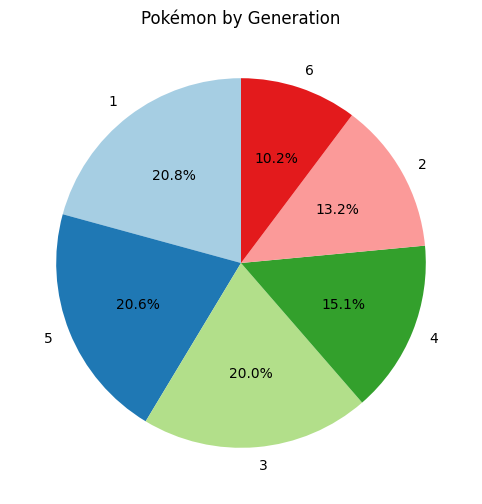

In [23]:
# Count Pokémon by generation
conteggio_generazione = df['Generation'].value_counts()
print(conteggio_generazione)

# Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(conteggio_generazione, labels=conteggio_generazione.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Pokémon by Generation')
plt.show()


Finally, we focus again on legendary Pokémon and study how they are distributed across generations. We count how many legendary Pokémon appear in each generation and plot the result as a bar chart. This makes it easy to compare generations and see whether the number of legendary Pokémon increases, decreases, or stays roughly stable over time.


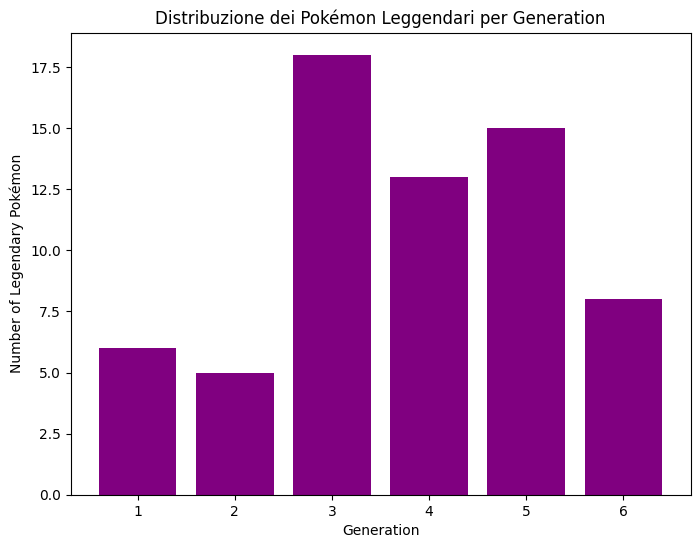

In [25]:
# Count legendary Pokémon by generation
leggendari_per_generazione = df[df['Legendary'] == True]['Generation'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(leggendari_per_generazione.index, leggendari_per_generazione.values, color='purple')
plt.xlabel('Generation')
plt.ylabel('Number of Legendary Pokémon')
plt.title('Distribuzione dei Pokémon Leggendari per Generation')
plt.show()


## Bipartite Network

In this activity we build and visualize a **bipartite network**, i.e., a network where nodes can be divided into **two distinct sets** and links exist only between nodes of different sets. This kind of network is very common when describing relationships such as “who is interested in what”, “who participates in what”, or “who uses what”.


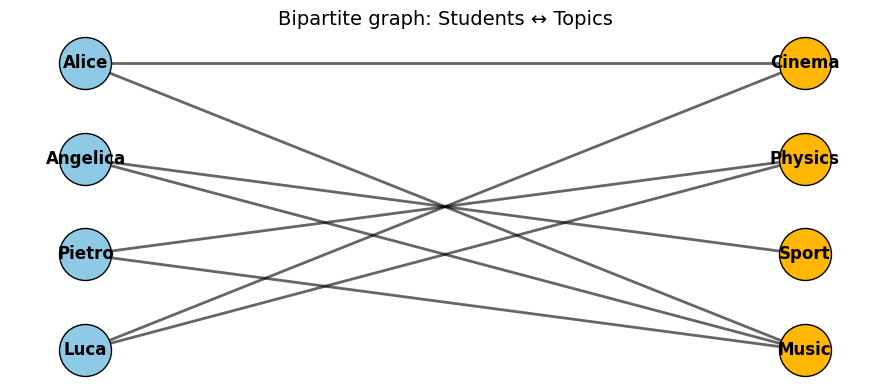

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

B = nx.Graph()

students = ["Luca","Pietro","Angelica","Alice"]
topics   = ["Music","Sport","Physics","Cinema"]

B.add_nodes_from(students, bipartite=0)
B.add_nodes_from(topics,   bipartite=1)

B.add_edges_from([
    ("Pietro","Physics"), ("Pietro","Music"),
    ("Angelica","Sport"), ("Angelica","Music"),
    ("Alice","Cinema"), ("Alice","Music"),
    ("Luca","Physics"), ("Luca","Cinema"),
])

# --- bipartite layout: two vertical columns ---
pos = {}
pos.update({s: (0, i) for i, s in enumerate(students)})
pos.update({t: (1, i) for i, t in enumerate(topics)})

plt.figure(figsize=(9, 4))

# edges first
nx.draw_networkx_edges(B, pos, width=2, alpha=0.6)

# nodes by set
nx.draw_networkx_nodes(B, pos, nodelist=students, node_size=1400,
                       node_color="#8ecae6", edgecolors="black")
nx.draw_networkx_nodes(B, pos, nodelist=topics, node_size=1400,
                       node_color="#ffb703", edgecolors="black")

# labels
nx.draw_networkx_labels(B, pos, font_weight="bold")

plt.title("Bipartite graph: Students ↔ Topics", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()


Here we take the most important step after a bipartite network: we compute the **projection** onto one of the two sets, in this case the **students**. The idea is to transform the “students–topics” network into a network where only students appear as nodes, connected if they share at least one topic. This way we move from “student–topic” to “student–student” similarity based on shared interests.


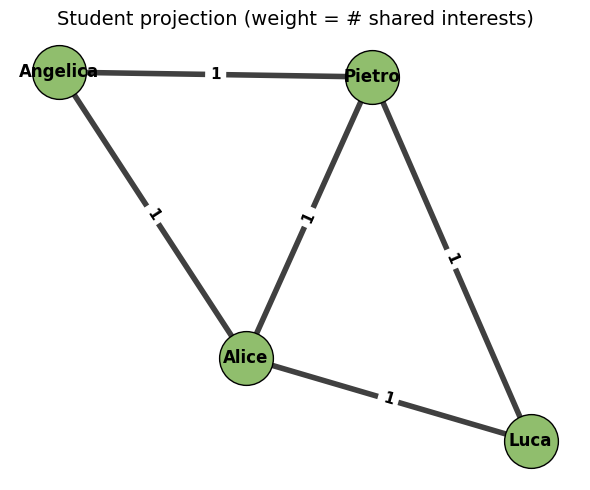

In [26]:

students_proj = bipartite.weighted_projected_graph(B, students)

pos2 = nx.spring_layout(students_proj, seed=2)


weights = [students_proj[u][v]["weight"] for u, v in students_proj.edges()]
widths  = [1.5 + 2.5*w for w in weights]  # scale thickness

plt.figure(figsize=(6, 5))

nx.draw_networkx_nodes(students_proj, pos2, node_size=1500,
                       node_color="#90be6d", edgecolors="black")
nx.draw_networkx_labels(students_proj, pos2, font_weight="bold")

nx.draw_networkx_edges(students_proj, pos2, width=widths, alpha=0.75)

# edge labels = weights
edge_labels = {(u, v): students_proj[u][v]["weight"] for u, v in students_proj.edges()}
nx.draw_networkx_edge_labels(students_proj, pos2, edge_labels=edge_labels,
                             font_size=11, font_weight="bold")

plt.title("Student projection (weight = # shared interests)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()
